# Chapter 9: Classification and Regression Trees (CART)

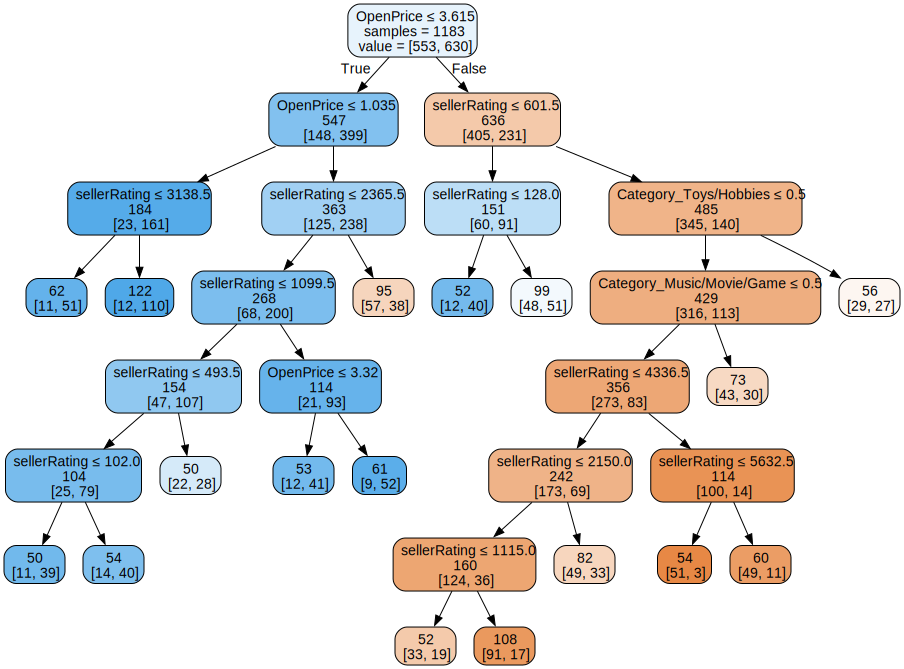

In [15]:
# Import required packages for this chapter
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pylab as plt

from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary

import matplotlib.pyplot as plt

from graphviz import Source

%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dmba import plotDecisionTree

# separate out the predictors and response variable
X = ebay_df.drop(columns='Competitive')
y = ebay_df['Competitive']

# partition the data into training (60%) and validation (40%) sets. Set random_state=1 for reproducibility of results
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# fit the tree
tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50)
tree.fit(X_train, y_train)

# plot the decision tree
plotDecisionTree(tree, feature_names=X.columns)





In [53]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('.')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

In [18]:
# Load the data
ebay_df = pd.read_csv(DATA / 'eBayAuctions.csv')

# convert categorical variables into indicator and drop the first column of each of them
ebay_df = pd.get_dummies(ebay_df, prefix_sep='_')
ebay_df.drop(columns=['Category_Antique/Art/Craft', 'currency_EUR', 'endDay_Fri'], inplace=True)

ebay_df.head()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,Category_SportingGoods,Category_Toys/Hobbies,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,5,0.01,0.01,0,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,3249,5,0.01,0.01,0,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,3249,5,0.01,0.01,0,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,3249,5,0.01,0.01,0,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,3249,5,0.01,0.01,0,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [25]:
# remove question mark from response name
ebay_df.columns = [c.replace('?', '') for c in ebay_df.columns]

# convert variable Duration to categorical data type
ebay_df['Duration'].astype('category')

# Separate out predictors and outcome variable 
X = ebay_df.drop(columns='Competitive')
y = ebay_df['Competitive']


In [26]:
# partition the data into training (60%) and validation (40%) sets. use random_state=1 for reproducibility of results
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [27]:
ebay_df.columns

Index(['sellerRating', 'Duration', 'OpenPrice', 'Competitive',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer', 'Category_Electronics',
       'Category_EverythingElse', 'Category_Health/Beauty',
       'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'currency_GBP',
       'currency_US'],
      dtype='object')

In [22]:
# Select only those variables which can be used for predicting the outcome of new auction.

# Create a new dataframe with predictors
predictors_df = ebay_df

columns = list(ebay_df.columns)
columns

columns.remove('ClosePrice')
columns.remove('endDay_Mon')
columns.remove('endDay_Sat')
columns.remove('endDay_Sun')
columns.remove('endDay_Thu')
columns.remove('endDay_Tue')
columns.remove('endDay_Wed')
ebay_df = ebay_df[columns]
ebay_df.columns

Index(['sellerRating', 'Duration', 'OpenPrice', 'Competitive',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer', 'Category_Electronics',
       'Category_EverythingElse', 'Category_Health/Beauty',
       'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'currency_GBP',
       'currency_US'],
      dtype='object')

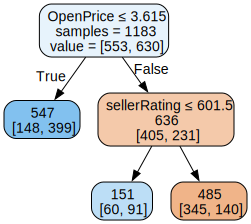

In [28]:
# separate out the predictors and response variable
X1 = ebay_df.drop(columns='Competitive')
y1 = ebay_df['Competitive']

# partition the data into training (60%) and validation (40%) sets. Set random_state=1 for reproducibility of results
train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X1, y1, test_size=0.4, random_state=1)

# fit the tree
smallClassTree1 = DecisionTreeClassifier(max_depth=7, min_samples_split=50, min_impurity_decrease=0.01)
smallClassTree1.fit(train_X1, train_y1)

plotDecisionTree(smallClassTree1, feature_names=train_X1.columns)

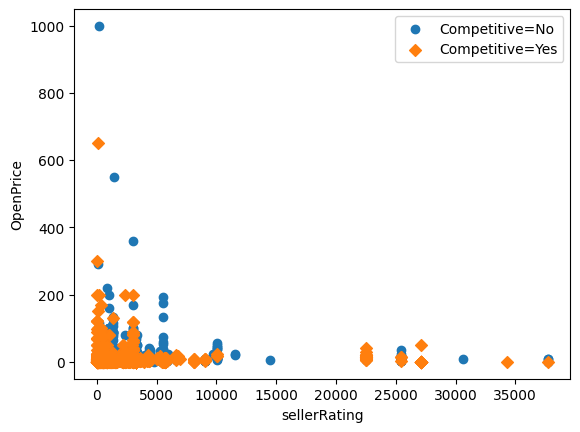

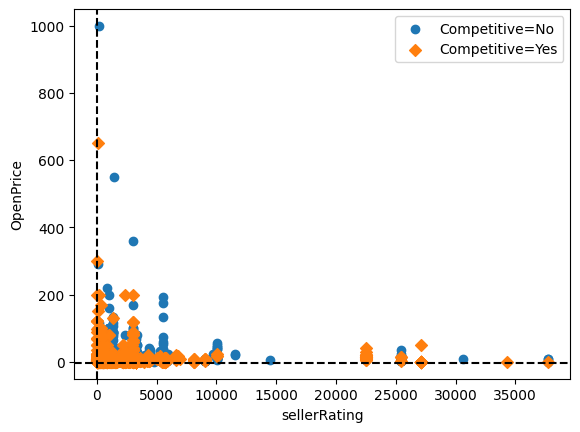

In [28]:
# plot sellerRating vs. OpenPrice 
fig, ax = plt.subplots()

subset = ebay_df.loc[ebay_df['Competitive']== 0]
ax.scatter(subset.sellerRating, subset.OpenPrice, marker='o', label='Competitive=No')

subset1 = ebay_df.loc[ebay_df['Competitive']== 1]
ax.scatter(subset1.sellerRating, subset1.OpenPrice, marker='D', label='Competitive=Yes')

plt.xlabel('sellerRating')  # set x-axis label
plt.ylabel('OpenPrice')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


# plot sellerRating vs. OpenPrice 
fig, ax = plt.subplots()

subset = ebay_df.loc[ebay_df['Competitive']== 0]
ax.scatter(subset.sellerRating, subset.OpenPrice, marker='o', label='Competitive=No')

subset1 = ebay_df.loc[ebay_df['Competitive']== 1]
ax.scatter(subset1.sellerRating, subset1.OpenPrice, marker='D', label='Competitive=Yes')

# Get the values of the features that create the splits in the decision tree
openprice_split = smallClassTree1.tree_.threshold[0]
sellerrating_split = smallClassTree1.tree_.threshold[1]

# Add vertical lines for OpenPrice split and horizontal line for sellerRating split
ax.axvline(x=openprice_split, color='black', linestyle='--')
ax.axhline(y=sellerrating_split, color='black', linestyle='--')

plt.xlabel('sellerRating')  # set x-axis label
plt.ylabel('OpenPrice')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


In [11]:
# apply log transformation on the variables OpenPrice and sellerRating
train_df = train_X.copy()
train_df['Competitive'] = train_y
train_df['log_OpenPrice'] = np.log(train_df['OpenPrice'])
train_df['log_sellerRating'] = np.log(train_df['sellerRating'])

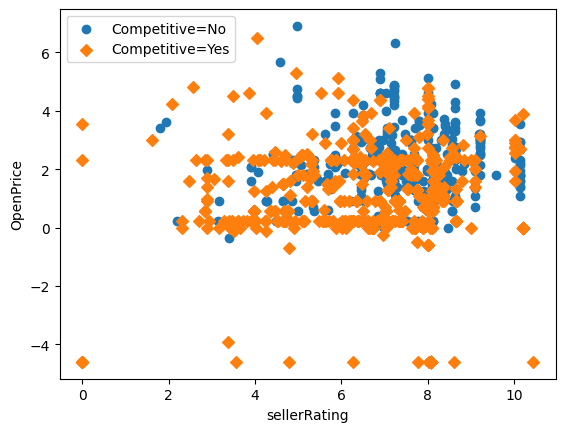

In [45]:
# plot sellerRating vs. OpenPrice 
fig, ax = plt.subplots()

subset = train_df.loc[train_df['Competitive']== 0]
ax.scatter(subset.log_sellerRating, subset.log_OpenPrice, marker='o', label='Competitive=No')

subset1 = train_df.loc[train_df['Competitive']== 1]
ax.scatter(subset1.log_sellerRating, subset1.log_OpenPrice, marker='D', label='Competitive=Yes')

plt.xlabel('sellerRating')  # set x-axis label
plt.ylabel('OpenPrice')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


In [42]:
# predicted classes
pred_t = smallClassTree1.predict(train_X1)
pred_v = smallClassTree1.predict(valid_X1)

# predicted probabilities for validation set
pred_prob_v = (smallClassTree1.predict_proba(valid_X1))

# put it together in a data frame
tree_result = pd.DataFrame({'actual': valid_y1,
                           'p(0)': [p[0] for p in pred_prob_v],
                           'p(1)': [p[1] for p in pred_prob_v],
                           'predicted': pred_v})
tree_result.head()

,actual,p(0),p(1),predicted
1287,0,0.711340,0.288660,0
1017,1,0.270567,0.729433,1
1047,0,0.711340,0.288660,0
108,1,0.270567,0.729433,1
1084,1,0.711340,0.288660,0


In [43]:
# confusion matrices for training and validation sets
print('Training Set: Confusion matrix\n')
classificationSummary(train_y1, pred_t)
print("\nValidation Set: Confusion matrix\n")
classificationSummary(valid_y1, pred_v)

Training Set: Confusion matrix

Confusion Matrix (Accuracy 0.7058)

       Prediction
Actual   0   1
     0 345 208
     1 140 490

Validation Set: Confusion matrix

Confusion Matrix (Accuracy 0.7072)

       Prediction
Actual   0   1
     0 228 125
     1 106 330


<Axes: xlabel='Percentile', ylabel='Lift'>

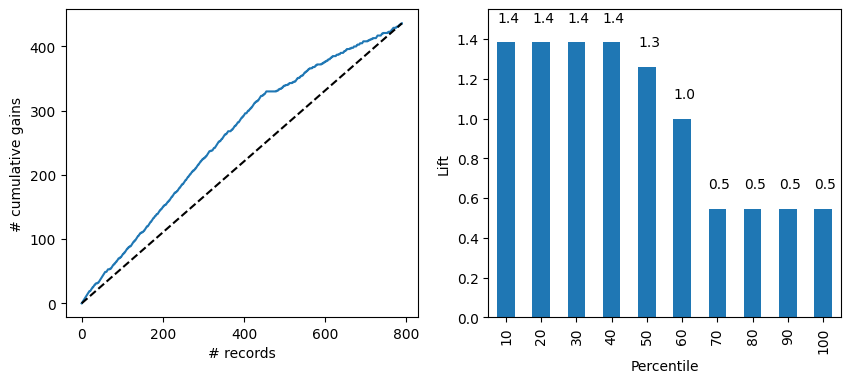

In [44]:
# lift chart for validation set
df = tree_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])